# Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes. 

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. 
Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes. 

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

# Objective:

To build a model to predict whether an individual is at risk of diabetes or not.

# Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [3]:
pima=pd.read_csv("//Users/nawarajadhikari/Desktop/ASDS/6302/Datasets/pima-indians-diabetes.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
data=pima.copy()

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Understand the shape of the dataset.

In [7]:
data.shape

(768, 9)

* There are 768 observations and 9 columns in the dataset

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations -**
* All variables are integer or float types
* There are no null values in the dataset

### Summary of the dataset.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations -**
* We have data of women with an average of 4 pregnancies.
* Variables like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values of 0 which might be data input errors and we should explore it further.
* There is a large difference between the 3rd quartile and maximum value for variables like SkinThickness, Insulin, and Age which suggest that there might be outliers present in the data.
* The average age of women in the data is 33 years.

### EDA

### Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Pregnancies

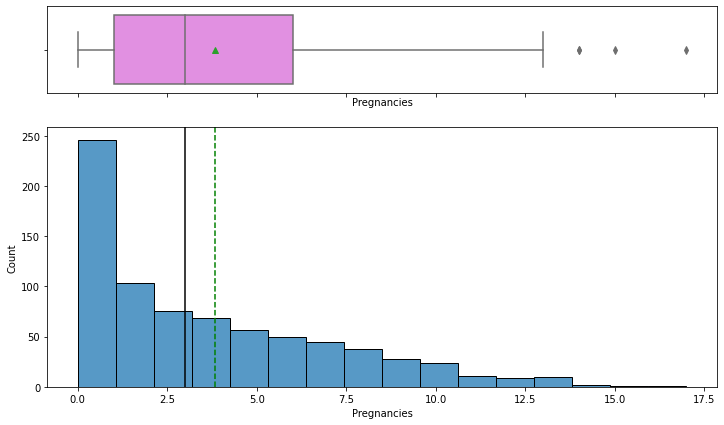

In [10]:
histogram_boxplot(data, "Pregnancies")

* The distribution of the number of pregnancies is right-skewed.
* The boxplot shows that there are few outliers to the right for this variable.
* From the boxplot, we can see that the third quartile (Q3) is approximately equal to 6 which means 75% of women have less than 6 pregnancies and an average of 4 pregnancies.

### Observations on Glucose

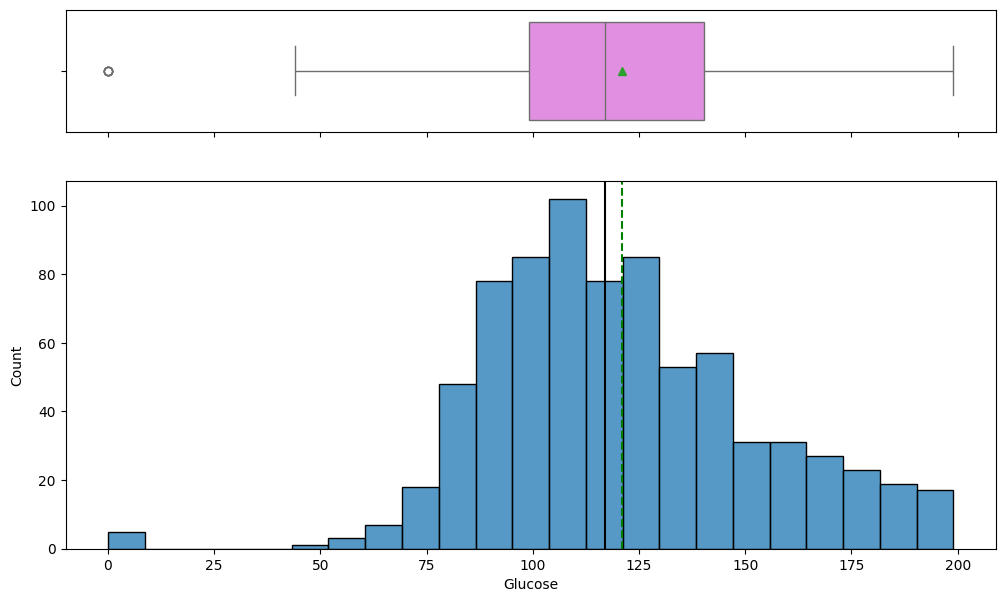

In [12]:
histogram_boxplot(data,"Glucose")

* The distribution of plasma glucose concentration looks like a bells-shaped curve i.e. fairly normal.
* The boxplot shows that 0 value is an outlier for this variable - but a 0 value of Glucose concentration is not possible we should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 140 which means 75% of women have less than 140 units of plasma glucose concentration.

### Observations on BloodPressure

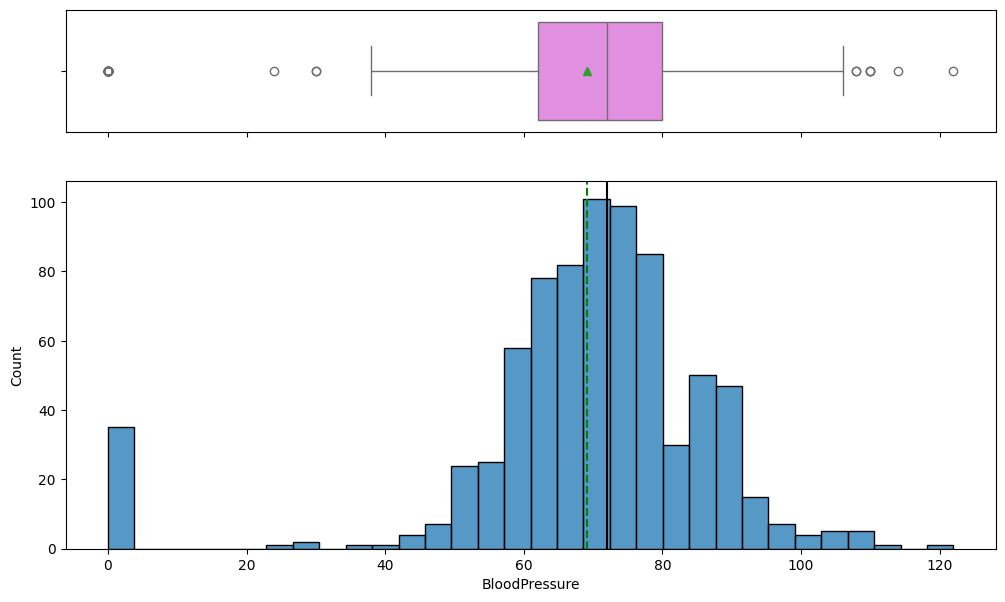

In [13]:
histogram_boxplot(data,"BloodPressure")

* The distribution for blood pressure looks fairly normal except few outliers evident from the boxplot.
* We can see that there are some observations with 0 blood pressure - but a 0 value of blood pressure is not possible and we should treat the 0 value as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 80 mmHg which means 75% of women have less than 80 mmHg of blood pressure and average blood pressure of 69 mmHg. We can say that most women have normal blood pressure.

### Observations on SkinThickness

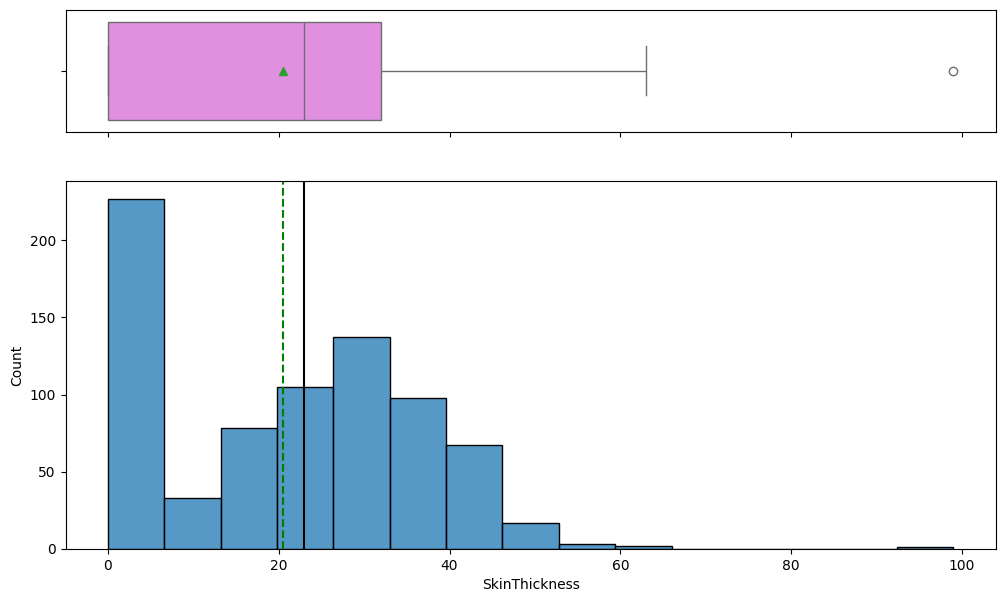

In [14]:
histogram_boxplot(data,"SkinThickness")

In [15]:
data[data['SkinThickness']>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
579,2,197,70,99,0,34.7,0.575,62,1


* There is one extreme value of 99 in this variable. 
* There are much values with 0 value of skin thickness but a 0 value of skin thickness is not possible and we should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 32 mm, which means 75% of women have less than 32 mm of skin thickness and an average skin thickness of 21 mm.

### Observations on Insulin

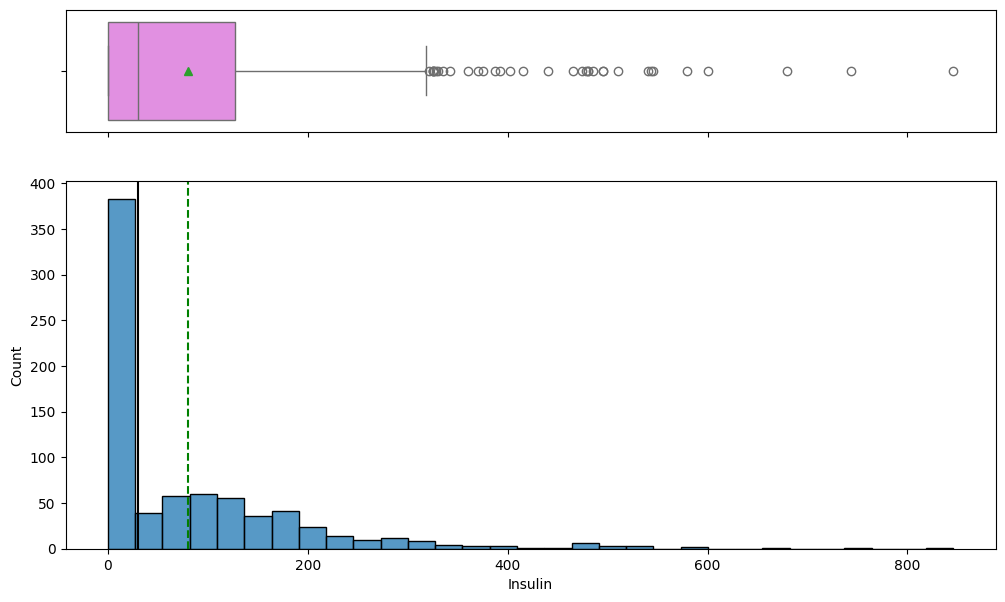

In [16]:
histogram_boxplot(data,"Insulin")

* The distribution of insulin is right-skewed.
* There are some outliers to the right in this variable.
* A 0 value in insulin is not possible. We should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 127 mu U/ml, which means 75% of women have less than 127 mu U/ml of insulin concentration and an average of 80 mu U/ml.

### Observations on BMI

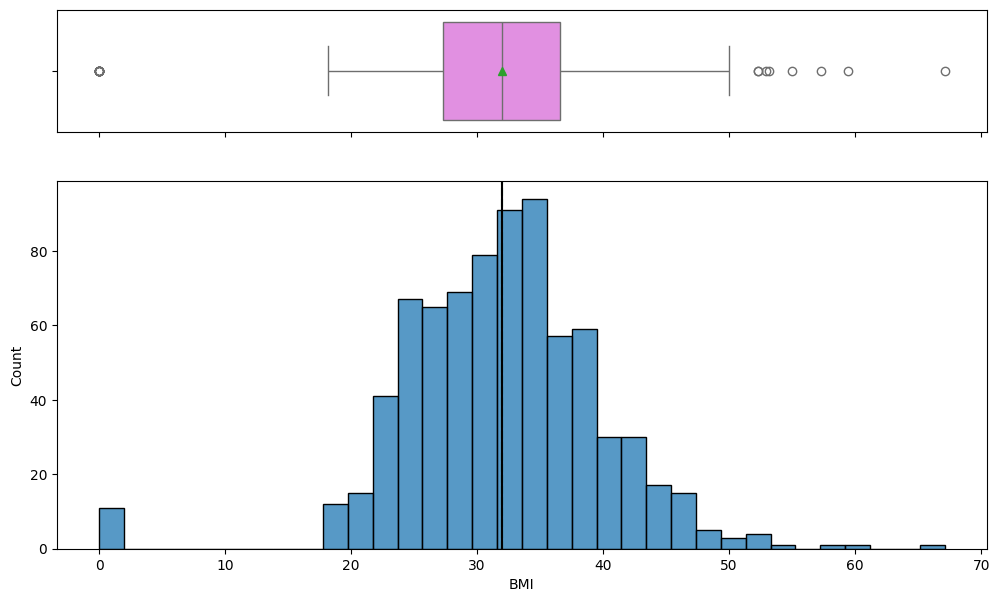

In [17]:
histogram_boxplot(data,"BMI")

* The distribution of mass looks normally distributed with the mean and median of approximately 32.
* There are some outliers in this variable.
* A 0 value in mass is not possible we should treat the 0 values as missing data.

### Observations on Pedigree

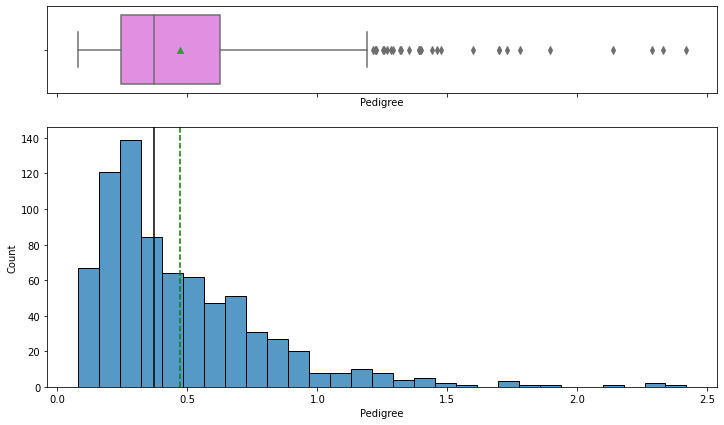

In [17]:
histogram_boxplot(data,"Pedigree")

* The distribution is skewed to the right and there are some outliers in this variable.
* From the boxplot, we can see that the third quartile (Q3) is equal to 0.62 which means 75% of women have less than 0.62 diabetes pedigree function value and an average of 0.47.

### Observations on Age

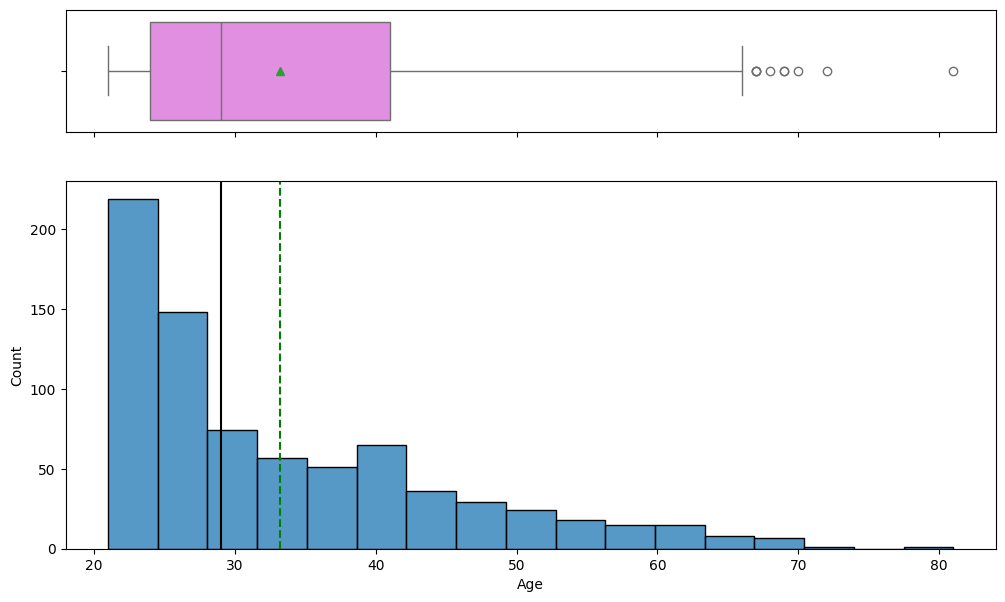

In [18]:
histogram_boxplot(data,"Age")

* The distribution of age is right-skewed.
* There are outliers in this variable.
* From the boxplot, we can see that the third quartile (Q3) is equal to 41 which means 75% of women have less than 41 age in our data and the average age is 33 years.

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Class

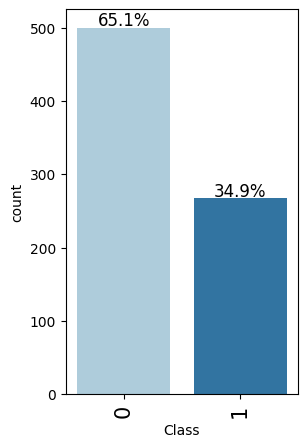

In [20]:
labeled_barplot(data,"Class",perc=True)

* The data is slightly imbalanced as there are only ~35% of the women in data who are diabetic and ~65% of women who are not diabetic.

### Observations on Preg

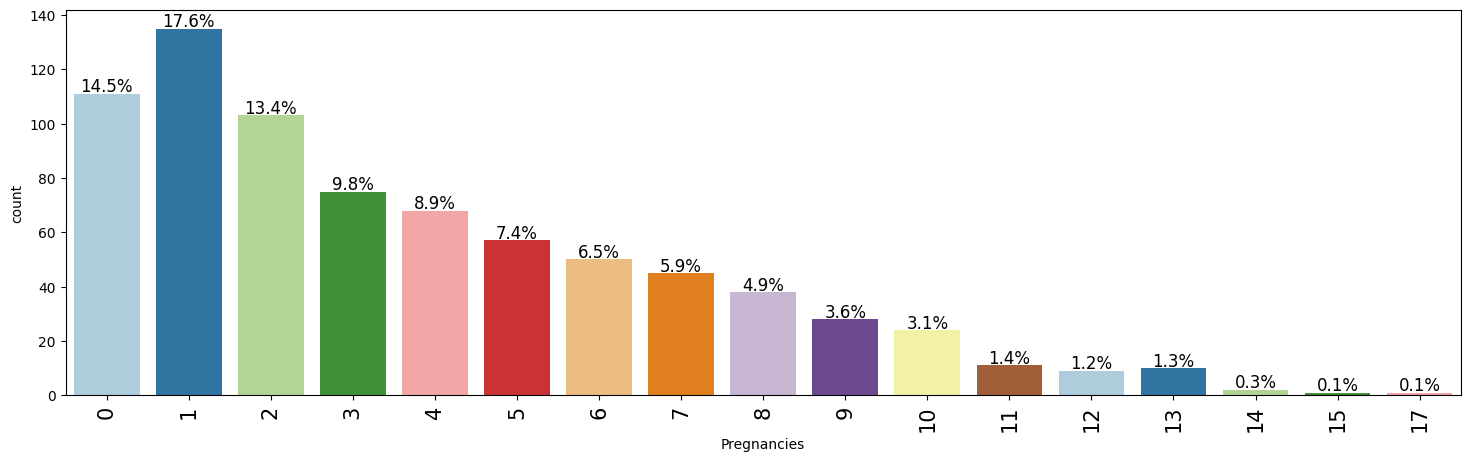

In [21]:
labeled_barplot(data,"Pregnancies",perc=True)

* The most common number of pregnancies amongst women is 1.
* Surprisingly, there are many observations with more than 10 pregnancies.

### Bivariate Analysis

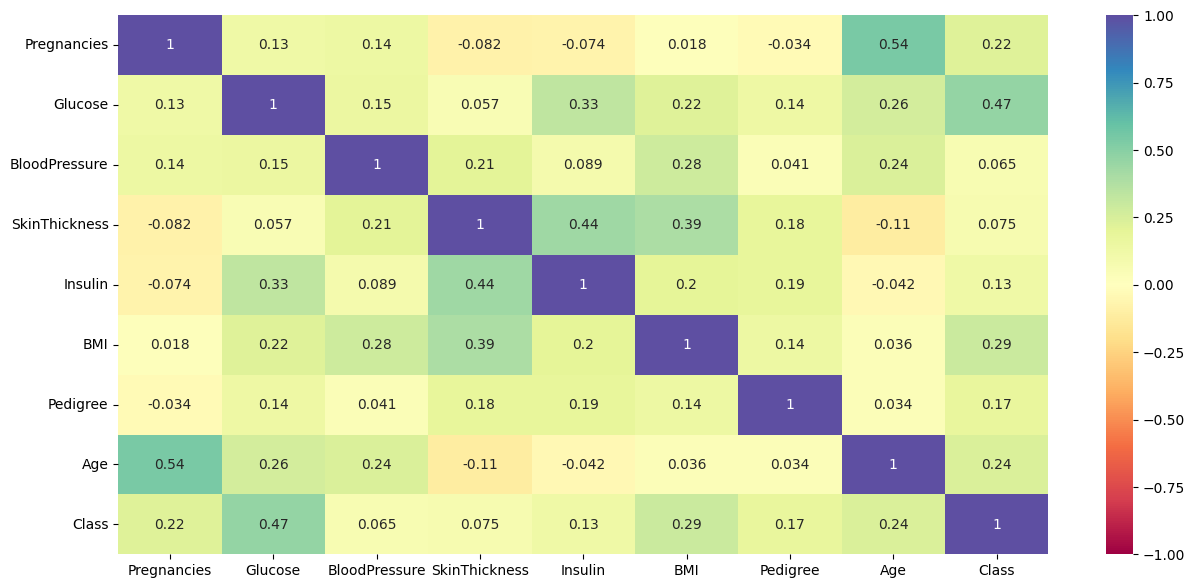

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations-**
* Dependent variable class shows a moderate correlation with 'Glucose'.
* There is a positive correlation between age and the number of pregnancies which makes sense.
* Insulin and skin thickness also shows a moderate positive correlation.

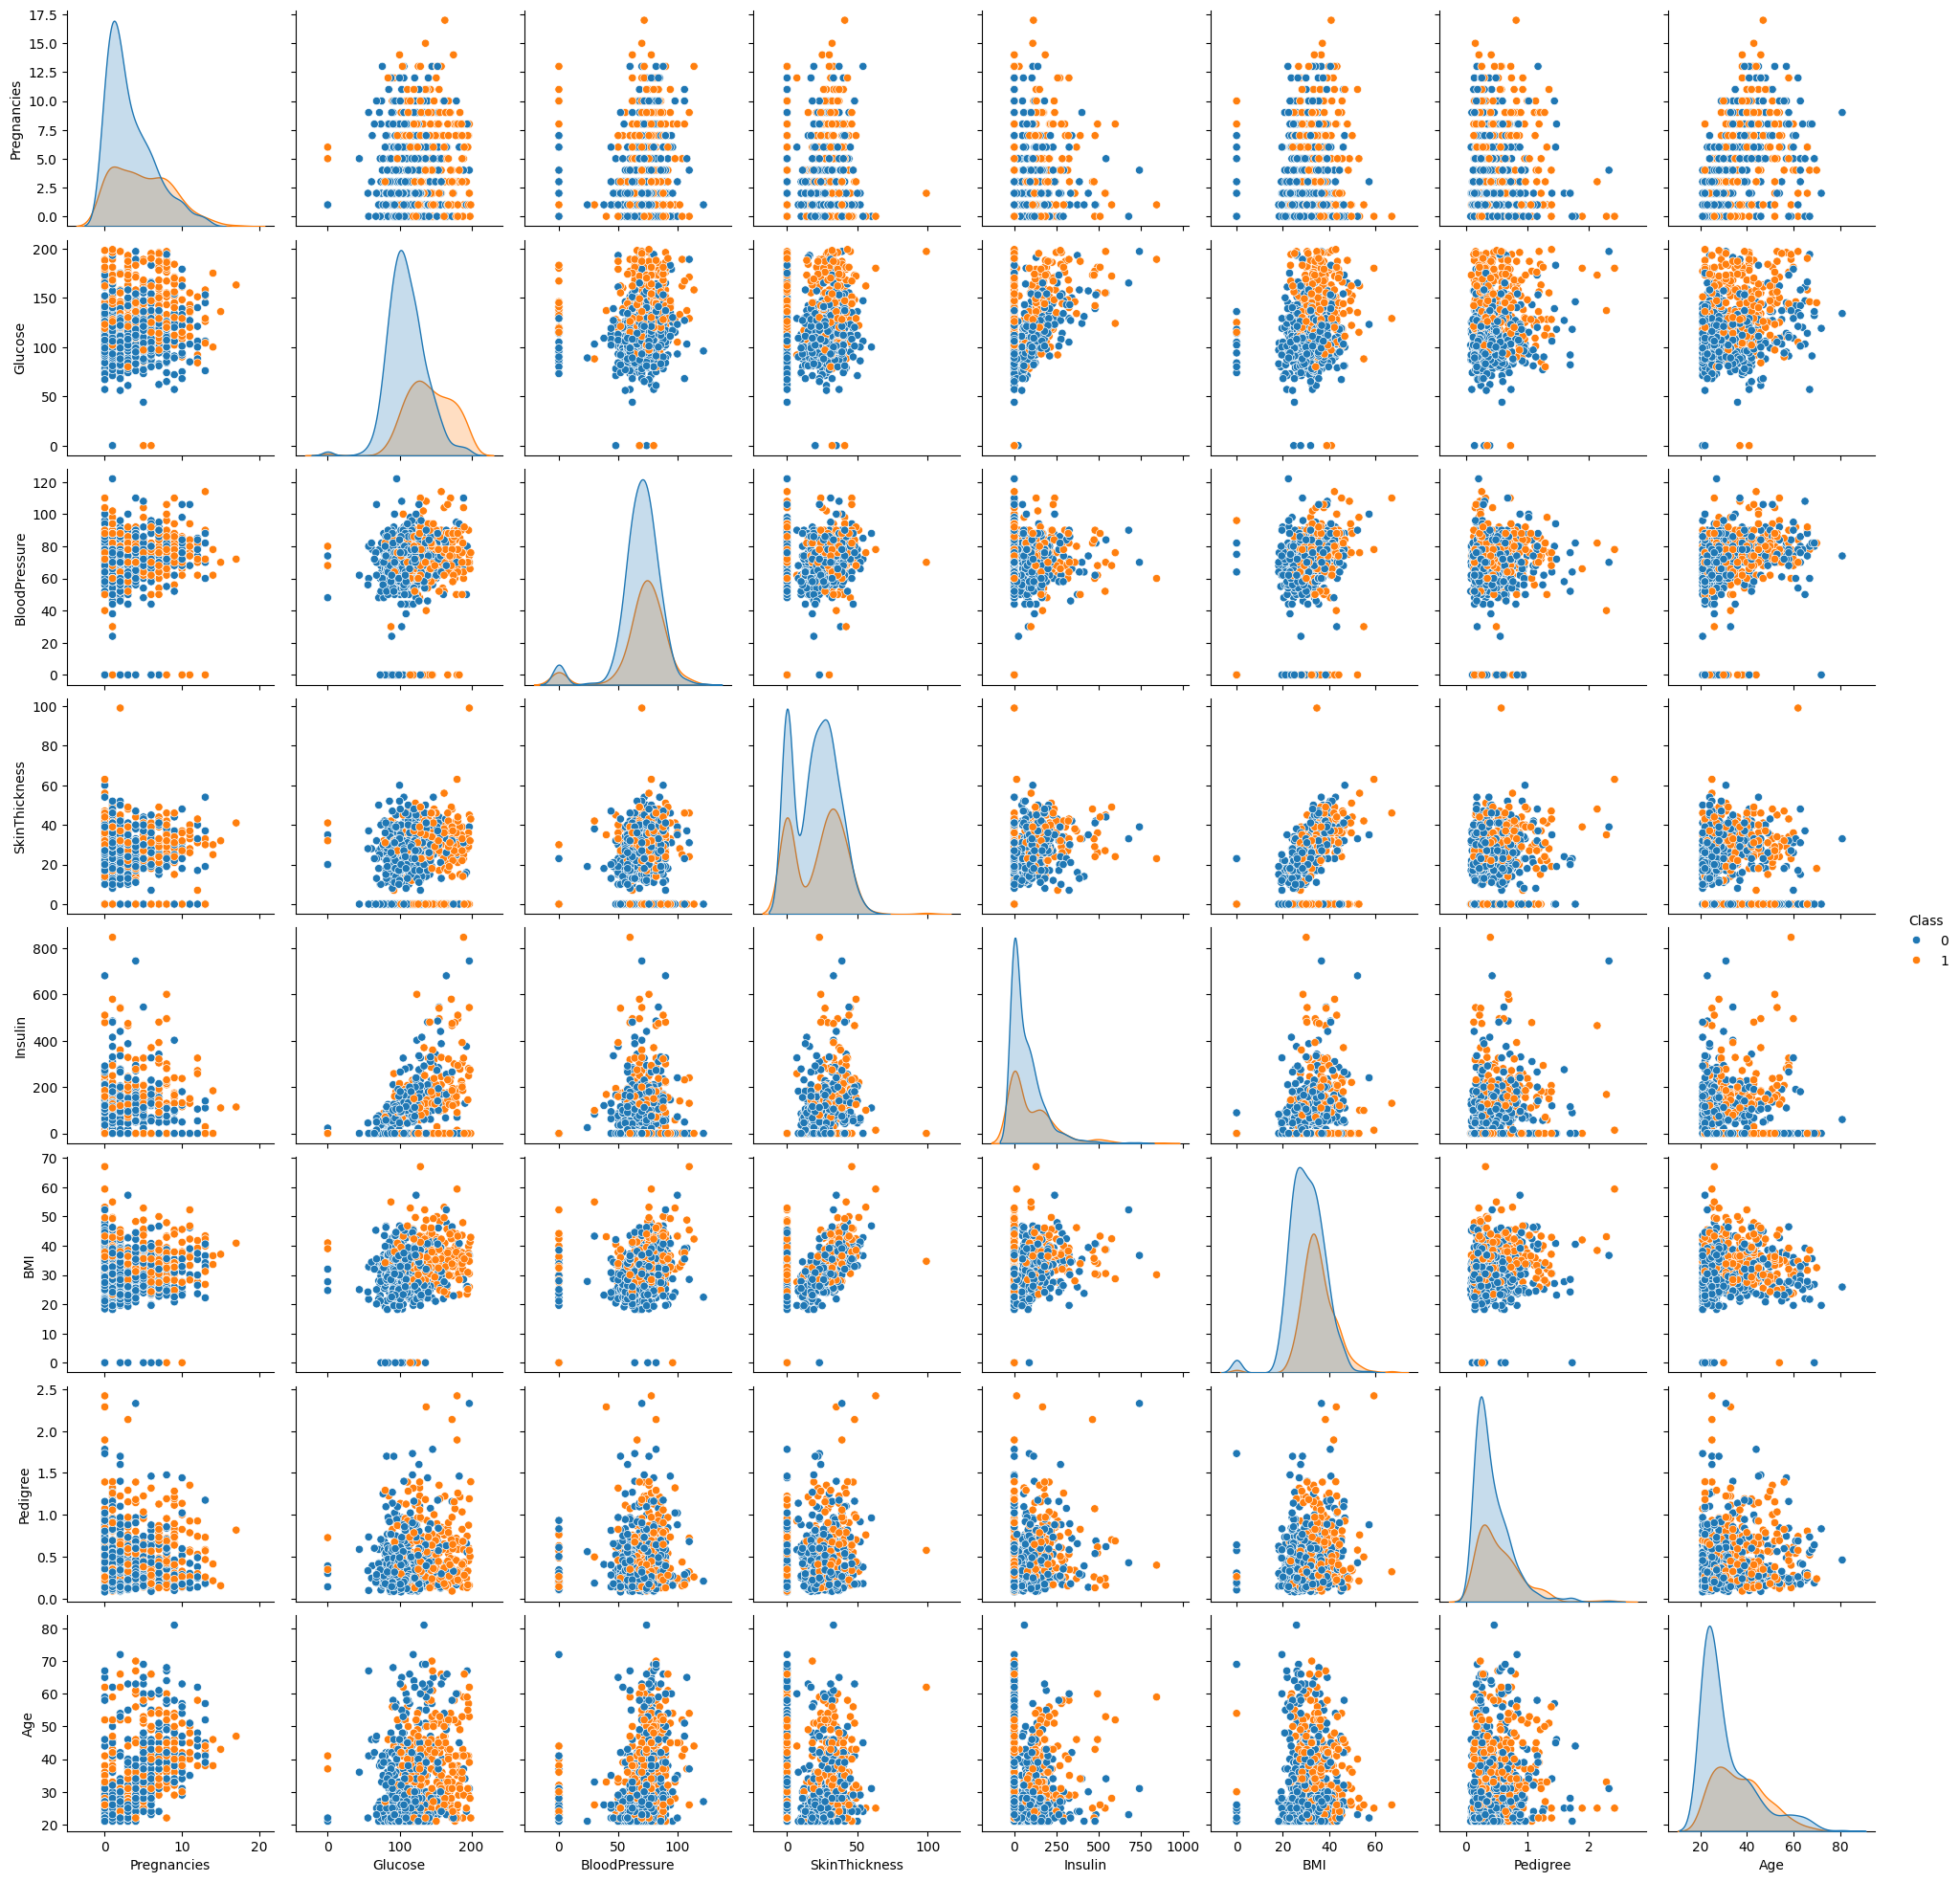

In [23]:
sns.pairplot(data=data,hue="Class")
plt.show()

* We can see that most non-diabetic persons have glucose concentration<=100 and BMI<30 
* However, there are overlapping distributions for diabetic and non-diabetic persons. We should investigate it further.

In [24]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="Class",y=data[x],palette="PuBu")
    plt.show()

### Class vs Pregnancies

In [25]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

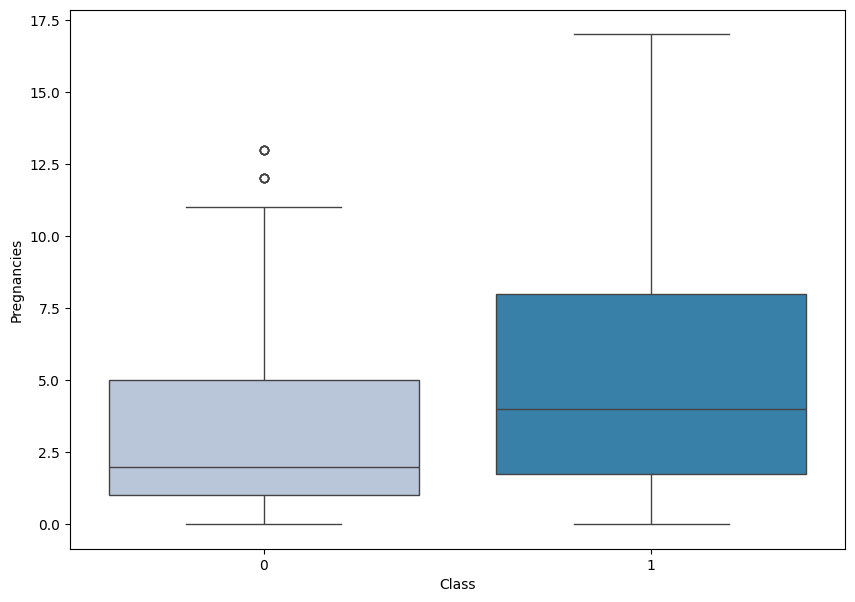

In [26]:
boxplot('Pregnancies')

* Diabetes is more prominent in women with more pregnancies.

### Class vs Glucose

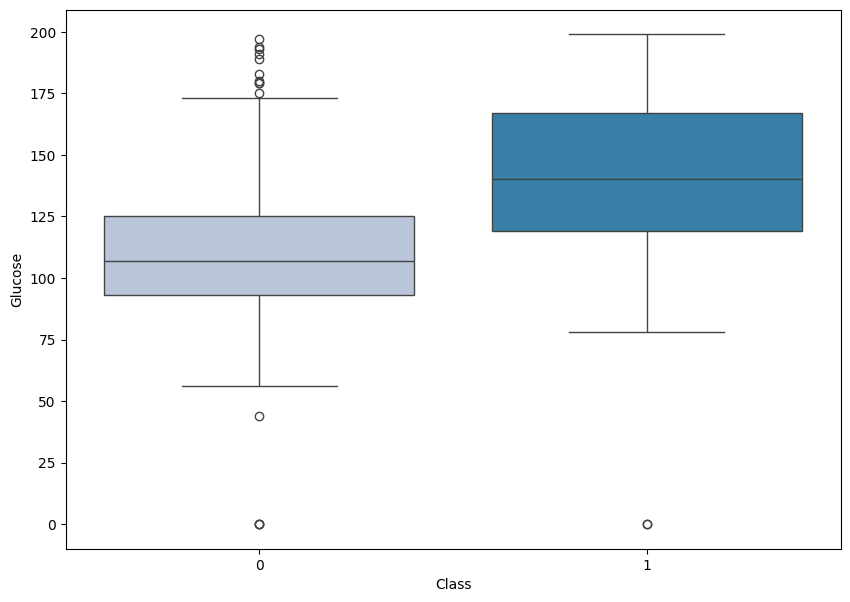

In [27]:
boxplot('Glucose')

* Women with diabetes have higher plasma glucose concentrations.

### Class vs BloodPressure

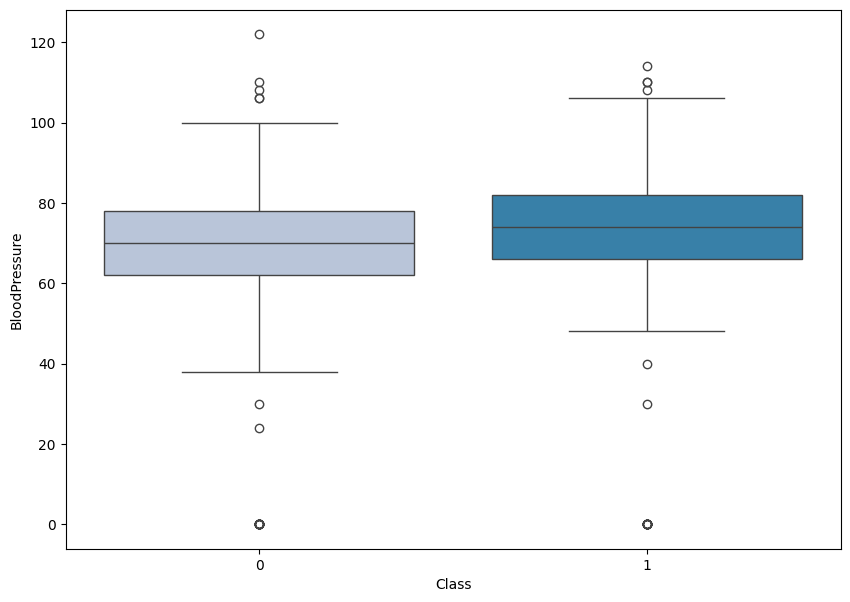

In [28]:
boxplot('BloodPressure')

* There is not much difference between the blood pressure levels of a diabetic and a non-diabetic person.

### Class vs SkinThickness

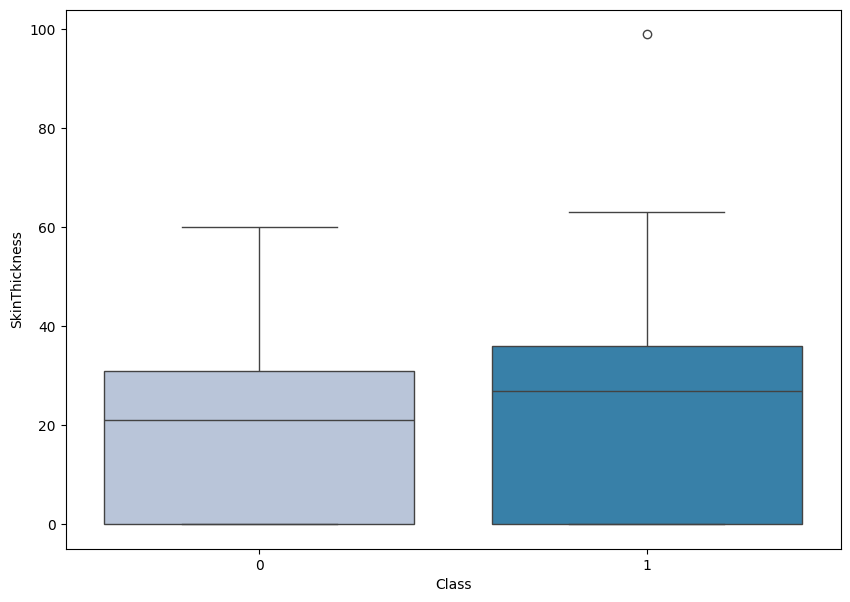

In [29]:
boxplot('SkinThickness')

* There's not much difference between skin thickness of diabetic and non-diabetic person.
* There is one outlier with very high skin thickness in diabetic patients

### Class vs Insulin

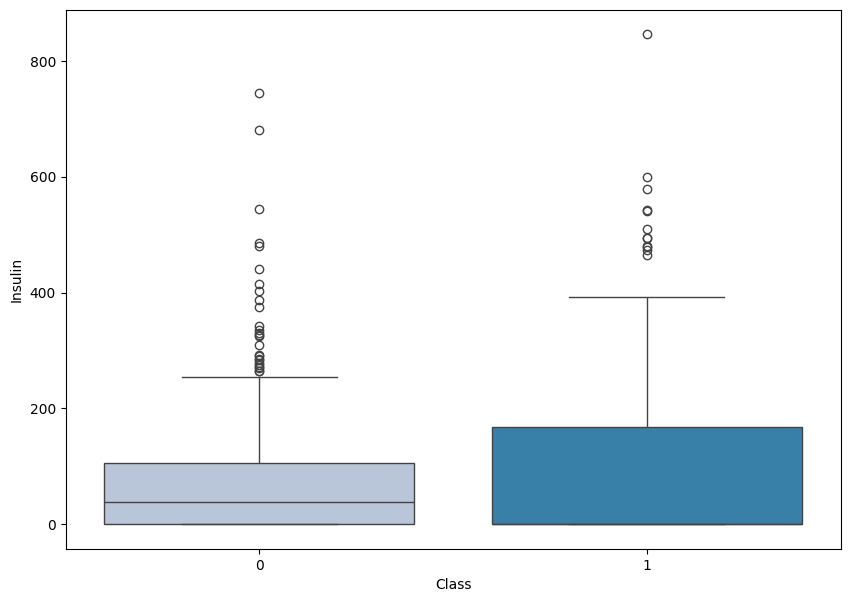

In [30]:
boxplot('Insulin')

* Higher levels of insulin are found in women having diabetes.

### Class vs BMI

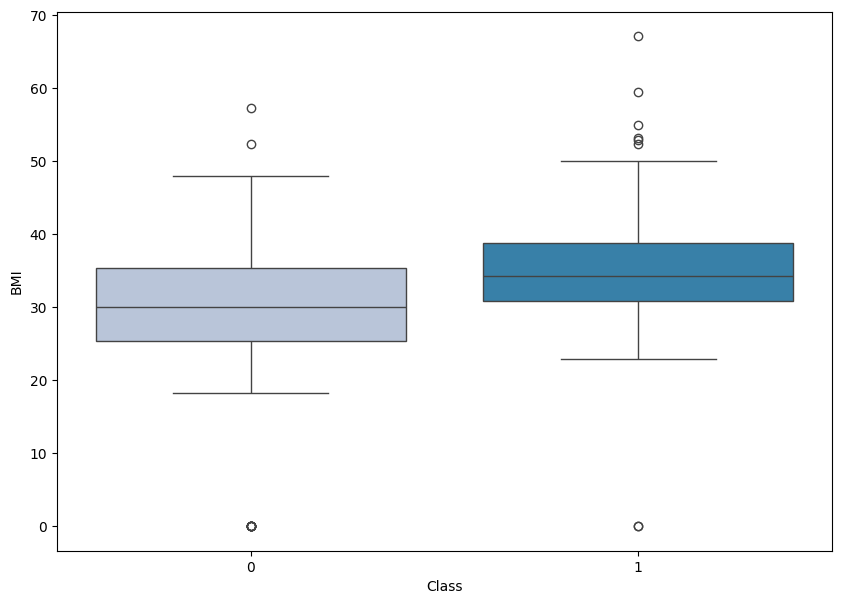

In [31]:
boxplot('BMI')

* Diabetic women are the ones with higher BMI.

### Class vs Pedigree

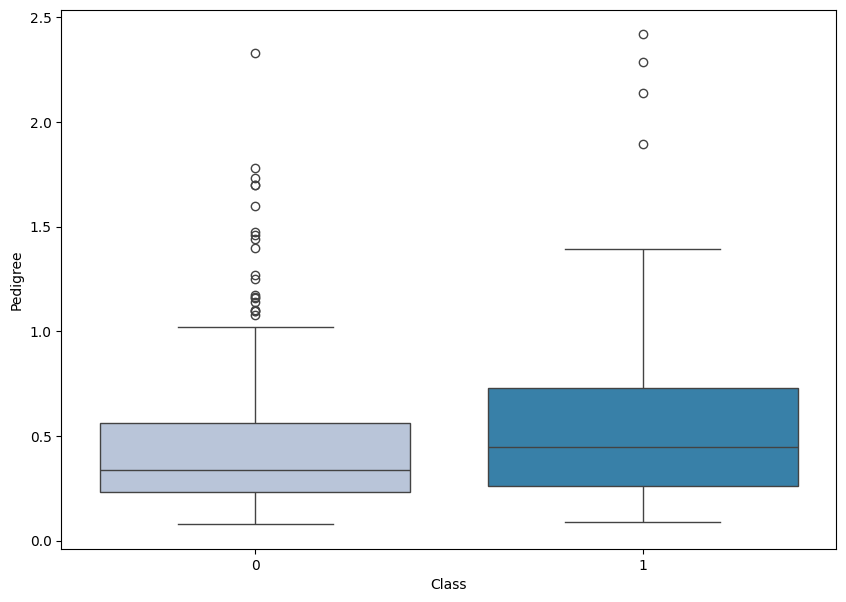

In [32]:
boxplot('Pedigree')

* Diabetic women have a higher diabetes pedigree function values.

### Class vs Age

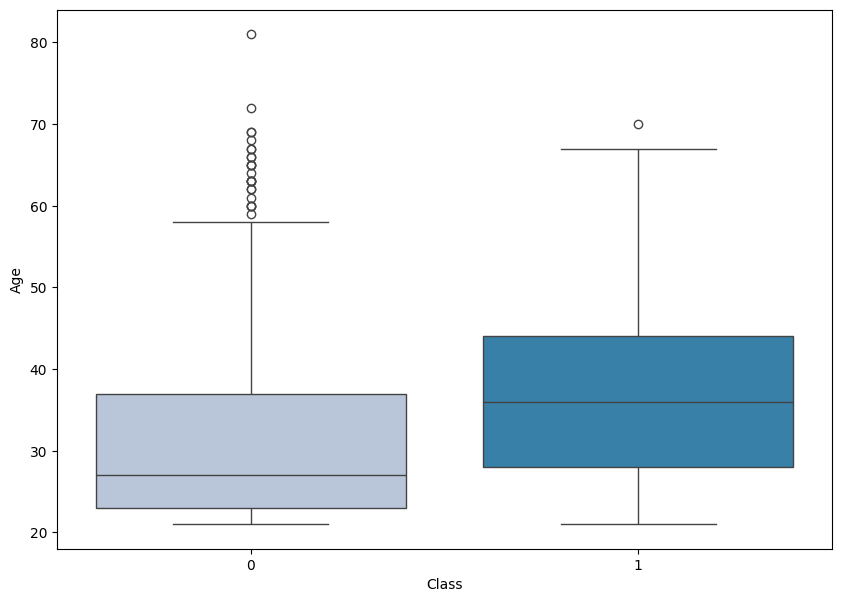

In [33]:
boxplot('Age')

* Diabetes is more prominent in middle-aged to older aged women. However, there are some outliers in non-diabetic patients

### Missing value treatment

In [34]:
data.loc[data.Glucose == 0, 'Glucose'] = data.Glucose.median()
data.loc[data.BloodPressure == 0, 'BloodPressure'] = data.BloodPressure.median()
data.loc[data.SkinThickness == 0, 'SkinThickness'] = data.SkinThickness.median()
data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()
data.loc[data.BMI == 0, 'BMI'] = data.BMI.median()

* 0 values replaced by the median of the respective variable

## Split Data

In [35]:
X = data.drop('Class',axis=1)
y = data['Class'] 

In [36]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [39]:
y.value_counts(1)

Class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [40]:
y_test.value_counts(1)

Class
0    0.649351
1    0.350649
Name: proportion, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a person doesn't have diabetes and the person has diabetes.
2. Predicting a person has diabetes, and the person doesn't have diabetes.

### Which case is more important? 
* Predicting a person doesn't have diabetes, and the person has diabetes.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes but the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

**Let's define a function to provide recall scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [42]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.731602  0.580247   0.626667  0.602564


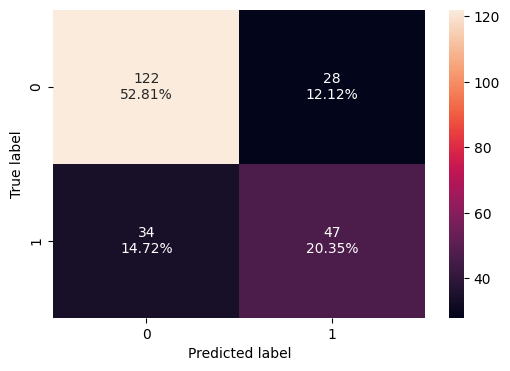

In [43]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is very low i.e. only 58%.

### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.753247  0.54321     0.6875  0.606897


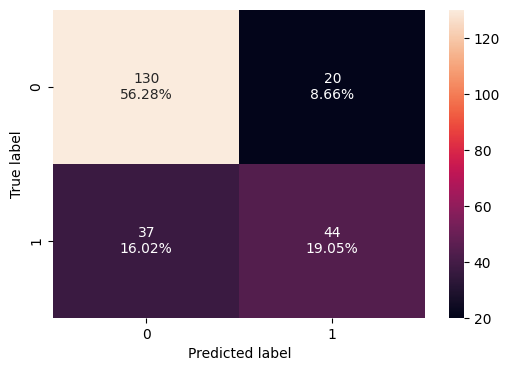

In [44]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994413  0.983957        1.0  0.991914
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744589  0.555556   0.661765  0.604027


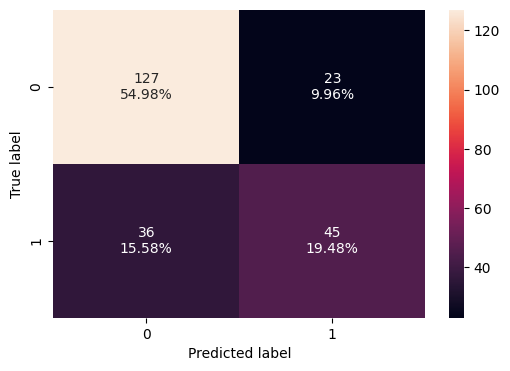

In [45]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier giving a similar performance as random forest.
* It is also overfitting the training data and lower test recall than decision trees.

### Tuning Decision Tree

In [46]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=np.int64(4),
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.811918  0.871658   0.679167  0.763466
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.688312  0.691358   0.543689  0.608696


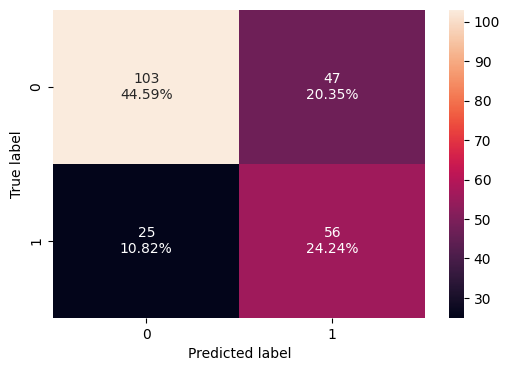

In [47]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Random Forest

In [48]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=np.int64(6),
                       max_features=np.float64(0.6),
                       max_samples=np.float64(0.9999999999999999),
                       min_impurity_decrease=0.01,
                       min_samples_split=np.int64(2), n_estimators=np.int64(30),
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.815642  0.882353   0.681818  0.769231  0.831176
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.748918  0.716049   0.623656  0.666667  0.741358


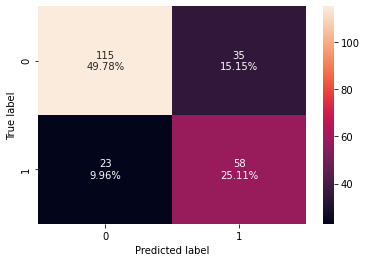

In [47]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Bagging Classifier

In [48]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.98324  0.957219   0.994444  0.975477  0.977181
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.74026  0.518519   0.666667  0.583333  0.689259


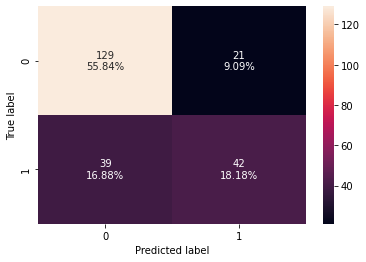

In [49]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.
* The confusion matrix shows that the model is not good at identifying patients who are at risk of diabetes.

## Comparing all the models

In [50]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,1.0,0.759777,1.0,0.815642,0.994413,0.983240
Recall,1.0,0.839572,1.0,0.882353,0.983957,0.957219
Precision,1.0,0.613281,1.0,0.681818,1.000000,0.994444
F1,1.0,0.708804,1.0,0.769231,0.991914,0.975477
ROC-AUC,1.0,0.778358,1.0,0.831176,0.991979,0.977181


In [51]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,0.731602,0.692641,0.753247,0.748918,0.744589,0.740260
Recall,0.580247,0.753086,0.543210,0.716049,0.555556,0.518519
Precision,0.626667,0.544643,0.687500,0.623656,0.661765,0.666667
F1,0.602564,0.632124,0.606897,0.666667,0.604027,0.583333
ROC-AUC,0.696790,0.706543,0.704938,0.741358,0.701111,0.689259


* A tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.

### Feature importance of tuned decision tree

In [52]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- weights: [59.50, 7.80] class: 0
|   |--- Age >  28.50
|   |   |--- Glucose <= 99.50
|   |   |   |--- weights: [16.10, 2.60] class: 0
|   |   |--- Glucose >  99.50
|   |   |   |--- weights: [19.60, 29.90] class: 1
|--- Glucose >  127.50
|   |--- BMI <= 28.85
|   |   |--- weights: [12.25, 9.10] class: 0
|   |--- BMI >  28.85
|   |   |--- weights: [15.05, 72.15] class: 1



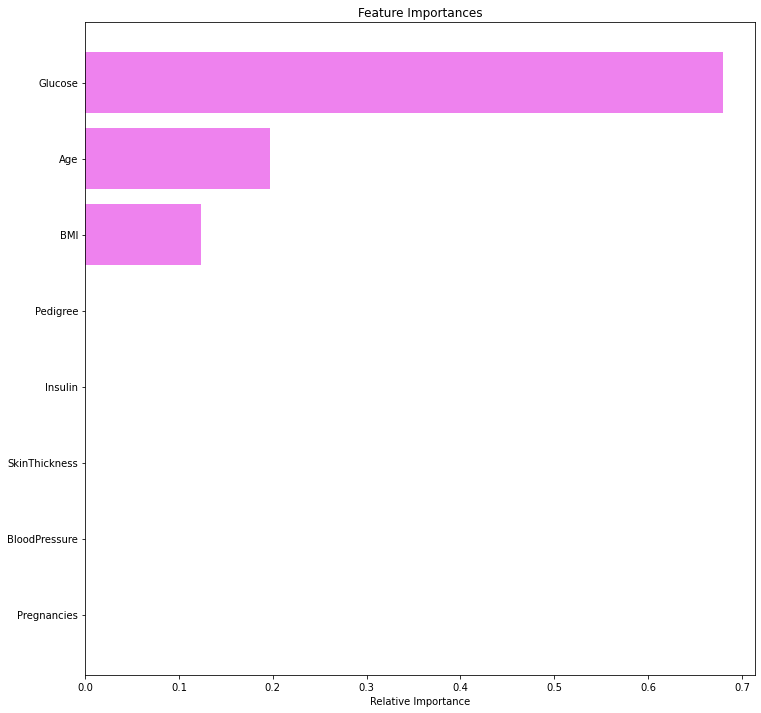

In [53]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We can see that Glucose concentration is the most important feature followed by Age and BMI.
* The tuned decision tree is using only three variables to separate the two classes. 

## Conclusion
* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 